In [1]:
# Importing the header files
import pandas as pd
import matplotlib.pyplot as plt
import graphlab
import re

In [2]:
# Reading the dataset
ratings = pd.read_csv('ml-20m/ratings.csv')
movies = pd.read_csv('ml-20m/movies.csv')
links = pd.read_csv('ml-20m/links.csv')
scores = pd.read_csv('ml-20m/genome-scores.csv')
tags = pd.read_csv('ml-20m/tags.csv')
gnometags = pd.read_csv('ml-20m/genome-tags.csv')

In [3]:
ratings.columns

Index([u'userId', u'movieId', u'rating', u'timestamp'], dtype='object')

In [4]:
movies.columns

Index([u'movieId', u'title', u'genres'], dtype='object')

In [5]:
links.columns

Index([u'movieId', u'imdbId', u'tmdbId'], dtype='object')

In [6]:
scores.columns

Index([u'movieId', u'tagId', u'relevance'], dtype='object')

In [7]:
tags.columns

Index([u'userId', u'movieId', u'tag', u'timestamp'], dtype='object')

In [8]:
gnometags.columns

Index([u'tagId', u'tag'], dtype='object')

In [9]:
ratings = ratings.drop(['timestamp'], axis=1)
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
# Extracting the year of movie release
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [12]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [13]:
scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [14]:
tags = tags.drop(['timestamp'], axis=1)
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [15]:
gnometags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B37C208>]],
      dtype=object)

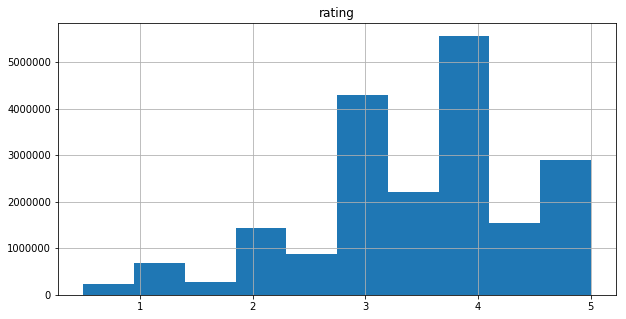

In [16]:
%matplotlib inline
ratings.hist(column='rating', figsize=(10,5))

In [17]:
# Combining the movies and ratings dataframe
combined = pd.merge(movies, ratings)
combined.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,11,4.5


In [18]:
combined.shape

(20000263, 6)

In [19]:
combined1 = combined.iloc[:1000000,:]
combined2 = combined.iloc[10000000:,:]

In [20]:
# Making a pivot table
pivot = combined1.pivot_table(index = ["userId"],columns = ["title"],values = "rating")

In [21]:
pivot.head()

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
movie_name = raw_input()

Unforgettable (1996)


In [23]:
# Find correlation between the input movie and other movies
print("Movies similar to the given movies are:")
movie_watched = pivot[movie_name]
similarity = pivot.corrwith(movie_watched)  
similarity = similarity.sort_values(ascending=False)
similarity.head()

Movies similar to the given movies are:


F:\Installed\Anaconda3\envs\py27\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
F:\Installed\Anaconda3\envs\py27\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Unforgettable (1996)                          1.000000
Nobody Loves Me (Keiner liebt mich) (1994)    0.970725
Headless Body in Topless Bar (1995)           0.960769
Target (1995)                                 0.923381
Shadows (Cienie) (1988)                       0.804476
dtype: float64

In [24]:
# Generalizing correlation in a function
def recommend(movie_name):
    print("Movies similar to the given movies are:")
    movie_watched = pivot[movie_name]
    similarity = pivot.corrwith(movie_watched)  
    similarity = similarity.sort_values(ascending=False)
    print similarity.head()

In [25]:
movie_name = raw_input()

Assassins (1995)


In [26]:
recommend(movie_name)

Movies similar to the given movies are:
title
Assassins (1995)                              1.000000
Target (1995)                                 0.733101
Headless Body in Topless Bar (1995)           0.673839
Catwalk (1996)                                0.562714
Nobody Loves Me (Keiner liebt mich) (1994)    0.553536
dtype: float64
